<h1 style="text-align: center; font-family: Arial"> LAB 0  </h1>
<h2 style="text-align: center; font-family: Arial"> Initiation à Python pour le Traitement de Signaux et d'Images </h2>

In [1]:
# Importe les modules qui seront utilisé dans le laboratoire.
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (14, 6.5)

# Exercice I: Vecteurs et Courbes

**1.** Calculer et afficher le résultat de $\sin(0)$ et $\sin(\dfrac{\pi}{2})$.

In [2]:
print("sin(0) = ", np.sin(0))
print("sin(pi/2) = ", np.sin(np.pi/2))

sin(0) =  0.0
sin(pi/2) =  1.0


**2.** Définir $t$ (401 points répartis entre $0$ et $4$), puis afficher la longueur du vecteur.

In [3]:
t = np.linspace(0, 4, 401)
print("t length = ", len(t))

t length =  401


**3.** Définir les signaux $s_0=\sin(\pi t)$, $s_1=\dfrac{\sin(3 \pi  t)}{3}$ et $s_2 = \dfrac{\sin(5 \pi  t)}{5}$.

In [4]:
s0 = np.sin(t*np.pi)
s1 = np.sin(3*t*np.pi)/3
s2 = np.sin(5*t*np.pi)/5

**4.** Tracer le graphique de $s_0$, $s_1$, $s_2$ et leur somme en fonction de $t$:

In [5]:
fig, ax = plt.subplots()
ax.plot(t, s0, '--')
ax.plot(t, s1, '--')
ax.plot(t, s2, '--')
ax.plot(t, s0+s1+s2)
ax.set_title('Signaux')
ax.legend(['s0', 's1', 's2', 'Somme'])
ax.set_xlabel('t')
ax.set_ylabel('Amplitude')
fig.show()

/home/gaby/.conda/envs/nnet/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


**5.** Calculer et afficher le signal: $$s(t)=\sum_{i=0}^{50} \dfrac{\sin\left( (2 i+1) \pi t\right)}{2i+1}$$

In [6]:
s = np.zeros_like(t)
for i in range(50):
    s += np.sin((2*i+1)*t*np.pi)/(2*i+1)

plt.plot(t, s)
plt.title('Somme des sinusoidales pour i de 0 à 50')
plt.show()

**6.** Calculer et afficher le même signal mais avec $i$ allant de $0$ à $500$.

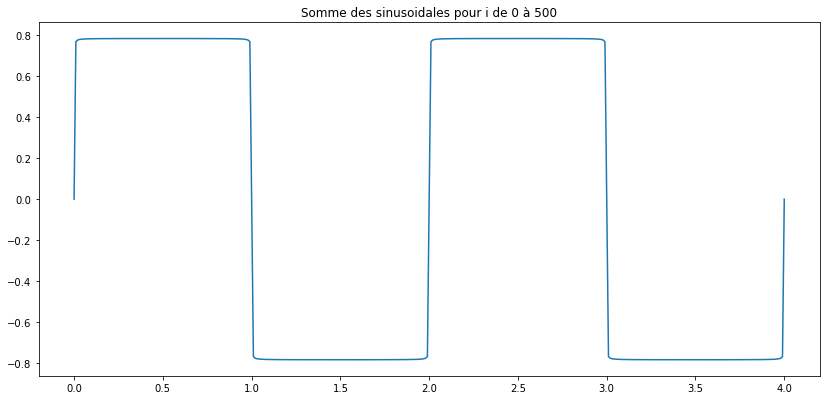

In [7]:
s = np.zeros_like(t)
for i in range(500):
    s += np.sin((2*i+1)*t*np.pi)/(2*i+1)

plt.plot(t, s)
plt.title('Somme des sinusoidales pour i de 0 à 500')
plt.show()

# Exercice II: Images et fonctions

In [8]:
from matplotlib.pyplot import imread 

**1.** Charger et afficher l'image _chat.png_.

In [9]:
img = imread('chat.png')

plt.imshow(img)
plt.show()

**2.** Afficher le type de la variable, le format de données du vecteur, les dimensions de la matrice.

In [10]:
print("Type de la variable: ", type(img))
print("Format de données: ", img.dtype)
print("Dimensions de la matrice: ", img.shape)
h, w, c = img.shape
print("Hauteur: %i | Largeur: %i" % (h, w))

Type de la variable:  <class 'numpy.ndarray'>
Format de données:  float32
Dimensions de la matrice:  (500, 600, 4)
Hauteur: 500 | Largeur: 600


**3.** Afficher le minimum et le maximum des valeurs de l'image. Puis afficher la moyenne des valeurs de chaque canal.

In [11]:
print("Min: %.2f, Max: %.2f" % (img.min(), img.max()))

Min: 0.00, Max: 1.00


**4.** Afficher la moyenne des valeurs pour chaque canal de l'image.

In [12]:
print("Moyenne par canal: ", img.mean(axis=(0,1)))

Moyenne par canal:  [0.6677444  0.65861297 0.69313985 1.        ]


**5.** Afficher uniquement la tête du chat ($93 \leq y < 230$ et $240 \leq x < 364$).

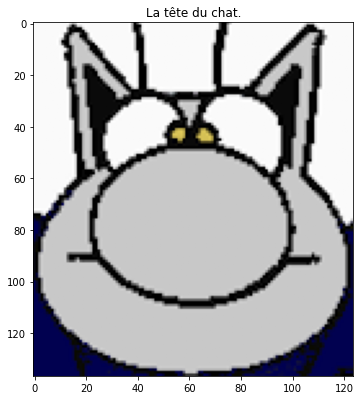

In [13]:
tete = img[93:230, 240:364]

plt.imshow(tete)
plt.title("La tête du chat.")
plt.show()

**6.** Afficher le canal bleu de l'image

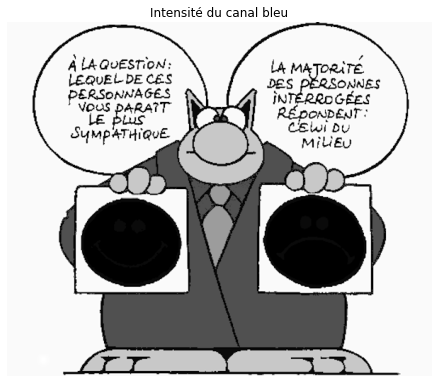

In [14]:
canal_bleu = img[:,:,2]

plt.imshow(canal_bleu, cmap='gray')
plt.axis('off') # Désactive les axes gradués
plt.title("Intensité du canal bleu")
plt.show()

**7.** Créer une fonction qui annule tous les canaux d'une image sauf un, spécifié en paramètre.

In [15]:
def select_channel(img, channel):
    """
    Annule tous les canaux de l'image sauf un. 
    @param img      L'image à manipuler.
    @param channel  Le numéro du canal à conserver (0, 1 ou 2).
    @return         L'image modifiée avec tous les canaux nul sauf un.
    """
    # On duplique l'image avant de la modifier pour ne pas altérer l'image initiale passée en paramètre.
    img = img.copy() 
    
    if channel != 0:
        img[:,:, 0] = 0
    if channel != 1:
        img[:,:, 1] = 0
    if channel != 2:
        img[:,:, 2] = 0

    # Syntaxe alternative en une seule ligne:
    # img[:,:, [c for c in range(3) if c != channel]] = 0

    return img

**6.** Afficher côte à côte tous les canaux de l'image:

/home/gaby/.conda/envs/nnet/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


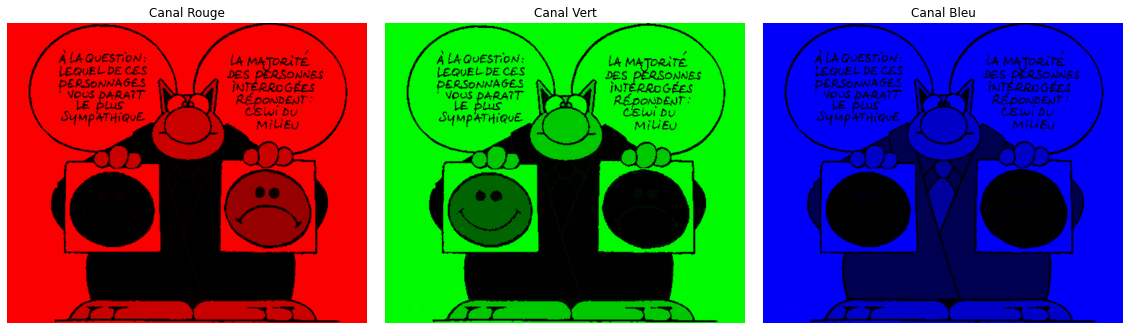

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(select_channel(img,0))
ax1.axis('off')
ax1.set_title('Canal Rouge')

ax2.imshow(select_channel(img,1))
ax2.axis('off')
ax2.set_title('Canal Vert')

ax3.imshow(select_channel(img,2))
ax3.axis('off')
ax3.set_title('Canal Bleu')

fig.set_size_inches(20,10)  # Augmente la taille de l'image
plt.subplots_adjust(wspace=.05) #Diminue la marge entre deux subplots
fig.show()


# Exercice III: Jeu de la vie

**1.** Charger la matrice ```map.npy``` et l'afficher.

/home/gaby/.conda/envs/nnet/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


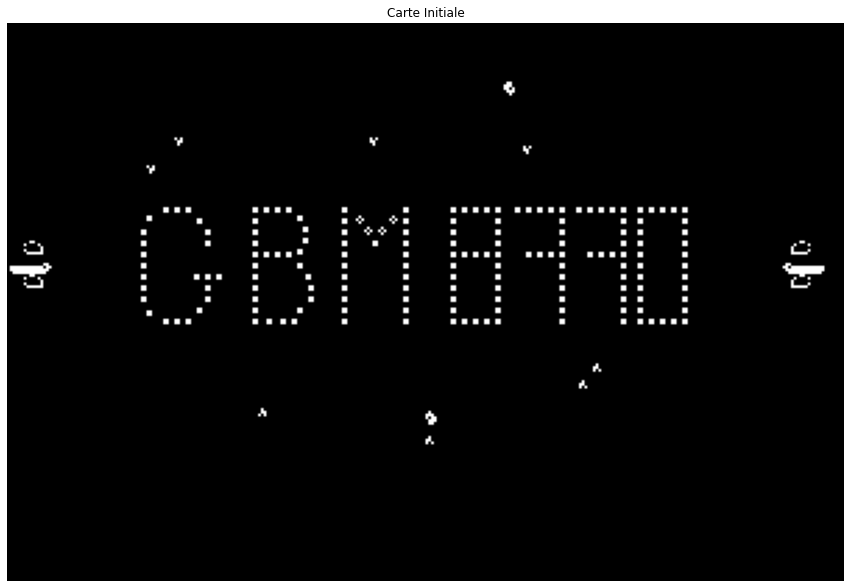

In [17]:
map = np.load('map.npy')

fig, ax = plt.subplots()
ax.imshow(map, cmap='gray')
ax.axis('off')
ax.set_title('Carte Initiale')
fig.set_size_inches(15,20)  # Augmente la taille de l'image
fig.show()

**2.** Afficher la carte du nombre de voisin de chaque pixel:

In [18]:
def N(carte):
    from scipy.ndimage import convolve
    return convolve(carte*1, np.ones((3,3)), mode='constant')


In [19]:
n = N(map)

plt.imshow(n)
plt.colorbar()      # Affiche l'échelle de couleur
plt.axis('off')
plt.title('Carte du nombre de voisin')
plt.show()

**3.** La relation de récursion pour chaque pixel est donnée par: $e_{i+1}\ =\ (N(e_i)==3)\ \ \text{OU}\ \ (N(e_i)==4\ \; \text{ET}\ \; e_i == 1)$.

Définir la fonction ```compute_next_map(e)``` qui prend en argument la carte actuelle et retourne la carte suivante. 


In [20]:
def compute_next_map(e):
    n = N(e)
    return (n==3) + (n==4) * (e==1)

**4.** Calculer et afficher cote-à-cote les carte $e_0$ (carte initiale égale à ```map```), $e_1$, $e_2$ et $e_3$.

/home/gaby/.conda/envs/nnet/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


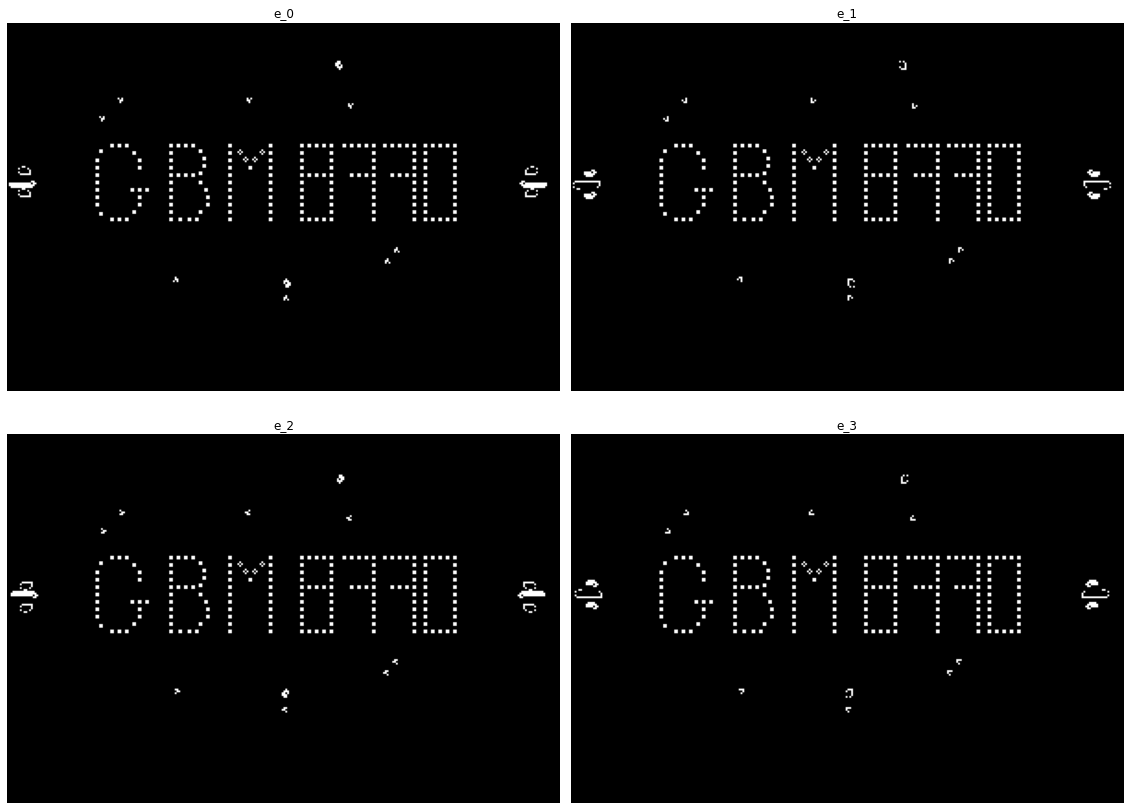

In [21]:
e0 = map>=1 
e1 = compute_next_map(e0)
e2 = compute_next_map(e1)
e3 = compute_next_map(e2)
e = [e0, e1, e2, e3]

fig, axs = plt.subplots(2,2)
for i in range(4):
    ax = axs.flatten()[i]
    ax.imshow(e[i], cmap='gray')
    ax.axis('off')
    ax.set_title('e_%i' % i)
fig.set_size_inches(20,15)
plt.subplots_adjust(wspace=.02, hspace=.02)
fig.show()

**4.** Afficher à l'aide d'une boucle ```while``` l'évolution de la carte itération après itération jusqu'à ce qu'un cycle stable soit atteint (le cycle aura une longueur de 2 itérations).

Utiliser ```clear_output(wait=True)``` avant ```plt.show()``` pour remplacer l'affichage précédent.

In [24]:
# Définition du nombre maximal de cartes stockées pour tester la stabilité
MAX_STORED_MAPS = 2
# Définition du nombre d'iteration effectuée à chaque affichage
SKIP_N_DISPLAY = 20

# Instanciation de la carte courante à partir de map
current_map = map.copy()

# Instanciation de la liste des MAX_STORED_MAPS dernières cartes
last_maps = []
# Instanciation de la variable d'arrêt de la boucle
stable = False
# Instanciation du compteur d'itérations
n_iterations = 0

# Tant que la carte n'est pas stable
while not stable:
    # On effectue SKIP_N_DISPLAY itérations
    for i in range(SKIP_N_DISPLAY):
        # On calcule la nouvelle carte
        current_map = compute_next_map(current_map)

        # On incrémente (on ajoute 1) au compteur
        n_iterations += 1

        # On vérifie si la carte est stable
        for previous_map in last_maps:
            # C'est-à-dire que toutes les cases d'une carte précédente soit similaire à la nouvelle
            if (previous_map == current_map).all():
                stable = True
                break       # Si c'est le cas on ne regarde pas les autres cartes précédentes, on sort de la boucle.

        # Syntaxe alternative en une seule ligne pour cette vérification: 
        # stable = any((previous_map == current_map).all() for previous_map in last_maps)

        # Si c'est le cas on force la sortie de la boucle for i in range(SKIP_N_DISPLAY)
        if  stable:
            break
        else:
            # Sinon on sauvegarde la dernière carte
            last_maps.append(current_map)
            # Et on retire la carte la plus ancienne si besoin
            if len(last_maps) > MAX_STORED_MAPS:
                del last_maps[0]

    # On nettoie l'affichage
    clear_output(wait=True)
    
    # On affiche la nouvelle carte
    plt.imshow(current_map, cmap='gray')
    plt.axis("off")
    if stable:
        plt.title("Iteration Finale: %i" % n_iterations)
    else:
        plt.title("Iteration %i" % n_iterations)
    plt.show()


La cellule de code suivante n'est pas demandée dans l'énoncé. 

Elle montre les deux images du cycle final et affiche en vert les pixels qui distinguent ces deux images.

In [23]:
map0, map1 = last_maps      # Lit les deux cartes du cycle
h, w = current_map.shape    # Lit la taille (hauteur, largeur) de ces cartes

# Définit des cartes coloriées pour les deux cartes où les pixels communs sont affichés en blancs et les pixels appartenant à l'une mais pas à l'autre apparaissent en vert.
colored_map0 = np.ones((h,w,3)) # Créer une carte de 1 (blanche) de même taille que les cartes du cycle mais avec 3 canaux de couleurs
colored_map0[map0==0] = 0       # Annule (rend noir) tous les pixels n'appartenant pas à la carte 0
colored_map0[map1==0, 0] = 0    # Annule les pixels rouges et ...
colored_map0[map1==0, 2] = 0    # bleus qui n'appartiennent pas à la carte 1 (ces pixels apparaitront ainsi en vert).

colored_map1 = np.ones((h,w,3))
colored_map1[map1==0] = 0
colored_map1[map0==0, 0] = 0
colored_map1[map0==0, 2] = 0

colored_maps = (colored_map0, colored_map1)

# Affiche les deux cartes recoloriées
fig, axs = plt.subplots(1,2)
for i, ax in enumerate(axs):
    ax.imshow(colored_maps[i], cmap='gray')
    ax.axis('off')
    ax.set_title('iteration %i' % i)

fig.suptitle('Cycle Final', fontsize='x-large', fontweight='bold')
fig.set_size_inches(25, 8.5)
fig.subplots_adjust(wspace=.01)
fig.show()

/home/gaby/.conda/envs/nnet/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
